In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error


In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.45867,22256928,56812,7724107,238700,151438,1044,112229070,2133614,...,54.17000,16.46000,105.71000,36.13000,46.36000,71.83000,5420048,475559,0.37660,45.77000
1,2,25.52114,4239408,105695,5844288,188902,264008,113582,284597324,1719318,...,65.79000,15.64000,111.79000,43.31000,47.58000,67.90000,12155631,371540,0.25150,35.02000
2,3,268.28804,6708500,87686,13008485,19704,150505,38501,807781054,1569740,...,45.08000,23.91000,110.15000,38.26000,49.26000,72.70000,11939870,225984,0.36790,46.22000
3,4,209.07160,36835247,70791,2520814,200111,253458,53719,667441334,922723,...,75.24000,13.06000,116.74000,39.37000,44.21000,73.01000,7045541,551342,0.05040,38.10000
4,5,3482.16919,23693467,75610,9276779,65532,278877,95178,74045467,1834970,...,56.85000,40.72000,115.18000,36.85000,45.46000,75.84000,11488805,254143,0.22190,39.16000


In [4]:
df.dtypes

Day                                     int64
EQ                                    float64
Social_Search_Impressions               int64
Social_Search_Working_cost              int64
Digital_Impressions                     int64
Digital_Working_cost                    int64
Print_Impressions.Ads40                 int64
Print_Working_Cost.Ads50                int64
OOH_Impressions                         int64
OOH_Working_Cost                        int64
SOS_pct                                 int64
Digital_Impressions_pct                 int64
CCFOT                                   int64
Median_Temp                             int64
Median_Rainfall                       float64
Fuel_Price                            float64
Inflation                             float64
Trade_Invest                            int64
Brand_Equity                          float64
Avg_EQ_Price                          float64
Any_Promo_pct_ACV                     float64
Any_Feat_pct_ACV                  

In [9]:
df.describe()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,...,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000,12000.00000
mean,6000.50000,638.00850,19620560.49933,63131.86017,6663405.32492,218973.24017,194404.53892,95406.49217,452681236.85275,1975918.26233,...,50.35461,28.90270,106.17342,38.65596,46.16209,70.64108,6688169.86892,549685.65092,0.21885,40.15931
std,3464.24595,1200.10967,10842983.37544,34518.85982,3824994.59418,124075.88237,85857.41971,55041.84601,230838061.38157,1017835.68493,...,16.44005,9.50625,8.22969,3.90315,1.89366,5.08196,3179592.09091,197373.14366,0.09883,5.12903
min,1.00000,0.01946,874111.00000,3546.00000,23440.00000,3493.00000,46372.00000,462.00000,54350613.00000,237429.00000,...,21.89000,12.34000,91.90000,31.90000,42.90000,61.90000,1234920.00000,209473.00000,0.04720,31.23000
25%,3000.75000,57.60432,10213886.75000,33164.00000,3330268.25000,112318.25000,120124.75000,47610.00000,251976015.75000,1095344.00000,...,36.10000,20.72000,99.03000,35.26000,44.52000,66.29000,3965402.50000,380095.25000,0.13318,35.73000
50%,6000.50000,210.73249,19494577.00000,62888.50000,6715113.00000,218230.50000,193609.50000,95586.00000,454057867.50000,1959212.00000,...,50.19000,28.96000,106.15000,38.62500,46.17000,70.67000,6619380.50000,547465.00000,0.22000,40.20000
75%,9000.25000,665.09357,29138522.00000,92461.75000,9956032.75000,326631.25000,268843.75000,143789.75000,655791128.75000,2854418.25000,...,64.57250,37.24000,113.28250,42.03000,47.79000,75.03000,9430345.00000,719804.75000,0.30540,44.56000
max,12000.00000,18557.56380,38272395.00000,123421.00000,13238741.00000,432340.00000,342242.00000,190389.00000,849360949.00000,3748194.00000,...,78.73000,45.34000,120.44000,45.44000,49.44000,79.44000,12234003.00000,893820.00000,0.38930,49.02000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1255eb640>]],
      dtype=object)

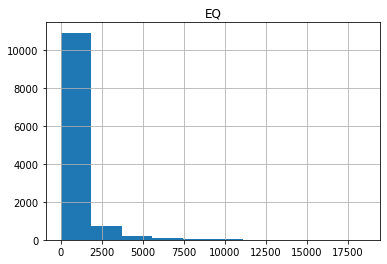

In [12]:
df.hist(column='EQ')

In [22]:
#Feature importance
y = df['EQ']   #target column 
X = df.drop('EQ',axis=1)  #independent columns
y=y.astype(int)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Specs              Score
7             OOH_Impressions 285771088210.97534
23            Est_ACV_Selling 161428753708.84091
1   Social_Search_Impressions  22022322398.31093
3         Digital_Impressions   5626578505.51956
34                EQ_Category   4503765525.24955
8            OOH_Working_Cost   1312221058.58128
35             EQ_Subcategory    194519246.98639
4        Digital_Working_cost    169950728.00285
5     Print_Impressions.Ads40     92271489.66323
6    Print_Working_Cost.Ads50     75141854.98275


[0.02613006 0.02828214 0.02570773 0.02602862 0.02609004 0.0259773
 0.02628213 0.02617661 0.02622002 0.02597569 0.02587145 0.02588826
 0.02560749 0.02868633 0.02597167 0.02753877 0.0259487  0.02563844
 0.02595273 0.02615866 0.02607724 0.02600357 0.02607178 0.02620367
 0.02621919 0.02598961 0.02808525 0.02602019 0.02612062 0.02619977
 0.02608764 0.0259685  0.02590795 0.0257828  0.02727033 0.02683582
 0.02697096 0.02605228]


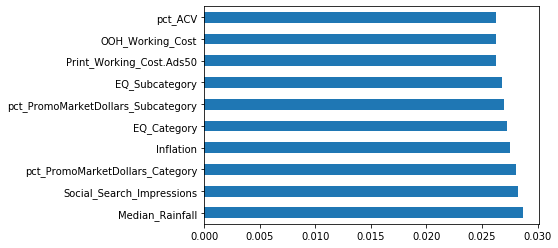

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

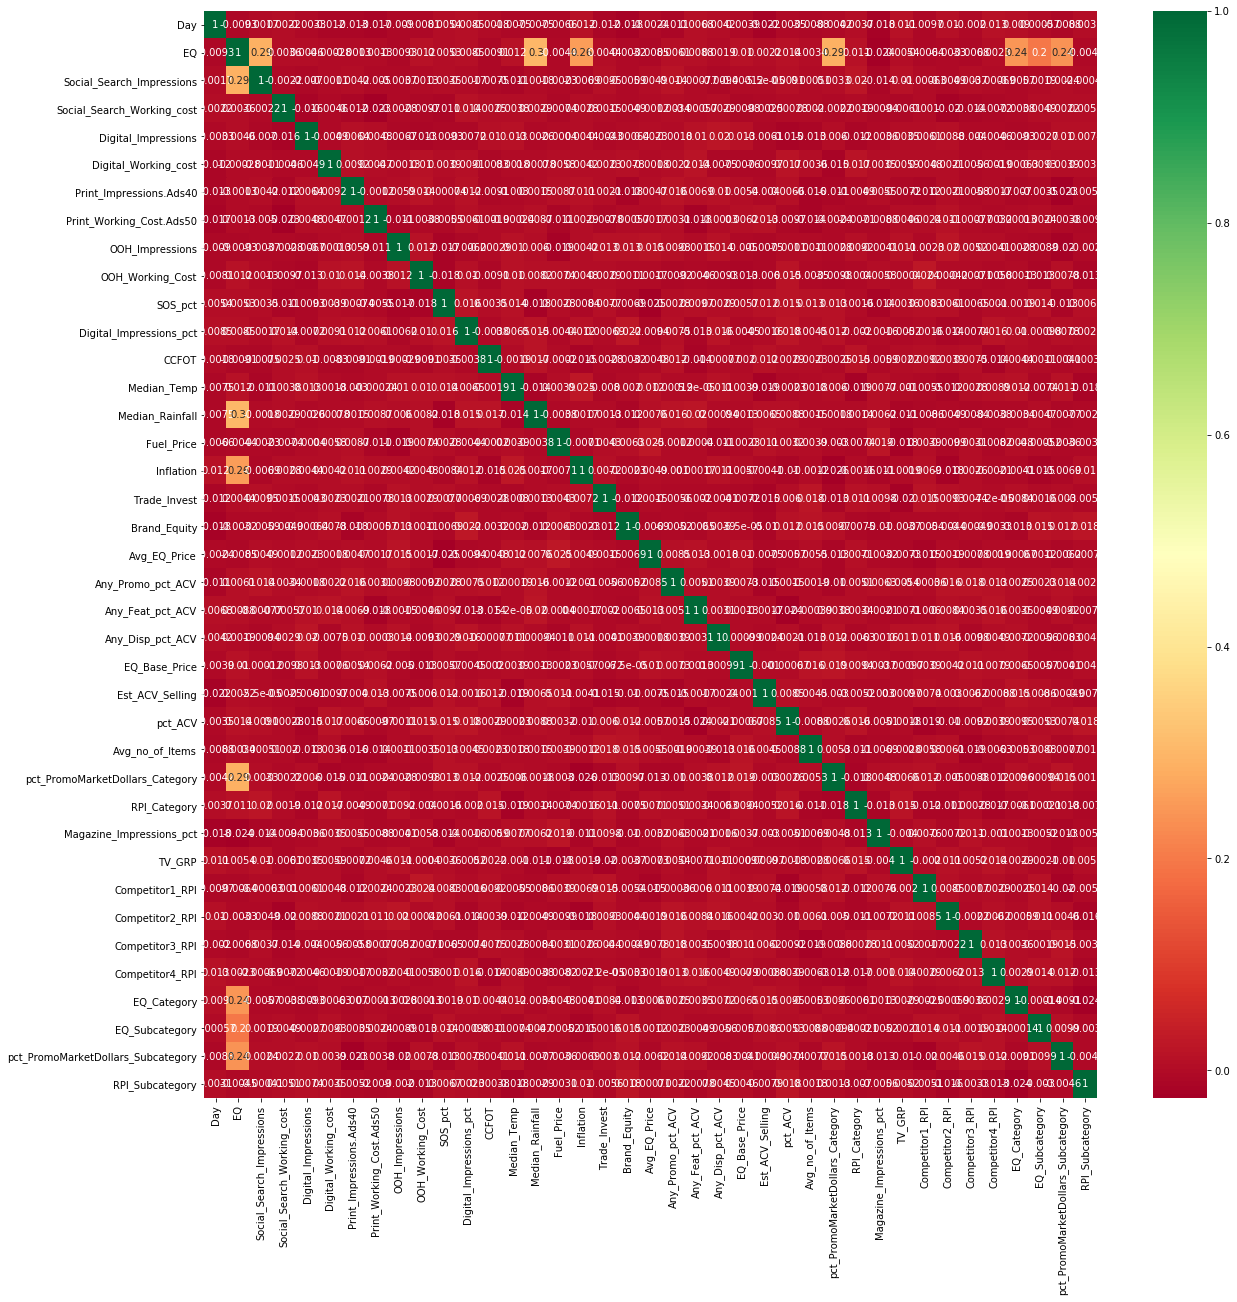

In [26]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [30]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('EQ',axis=1),df['EQ'],test_size=.2,random_state=21)

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 975058.6781


In [35]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 538607.9634


In [38]:
model = SVR(gamma='auto')
model.fit(X_train,y_train)
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 2036716.7958


In [40]:
clf_mlp = MLPRegressor(hidden_layer_sizes=(5, ), activation='relu', solver='sgd', alpha=0.001 )
clf_mlp.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf_mlp.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 2137830458836815164567498484910774762633832766894166245376.0000


In [34]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 301703.4582


In [60]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
test = test.drop('EQ', axis=1)

In [54]:
np.shape(test)

(39, 39)

In [61]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
res = pd.Series(clf.predict(test))
res.to_csv('out.csv',index=True)


<ipython-input-61-2754167592bf>:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  res.to_csv('out.csv',index=True)
